In [ ]:
#https://github.com/albumentations-team/albumentations
#https://github.com/albumentations-team/albumentations_examples
!pip install --upgrade albumentations

     |████████████████████████████████| 102 kB 7.0 MB/s 
     |████████████████████████████████| 47.6 MB 73 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


# read image

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import label2rgb

def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

def visualize(image):
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(image)

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, font_scale_aug=0.35, show_title=True, **kwargs):
    augmented = aug(image=image,mask=mask,bboxes=bboxes, category_id=categories)

    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')

        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')

        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()

    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]


def augment_and_show_onlypic(aug,image,categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, font_scale_aug=0.35, show_title=True, **kwargs):
  augmented = aug(image=image,category_id=categories)

  image = image
  image_aug = augmented['image']
  f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
  ax[0].imshow(image)
  ax[0].set_title('Original image')
        
  ax[1].imshow(image_aug)
  ax[1].set_title('Augmented image')

  f.tight_layout()

  if filename is not None:
      f.savefig(filename)
        
  return augmented['image']

image shape: (300, 450, 3)


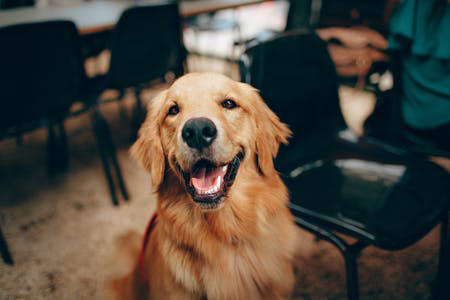

In [ ]:
import PIL
import numpy as np
import requests
import io

response = requests.get("https://images.pexels.com/photos/2253275/pexels-photo-2253275.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=150&w=300")
image_bytes = io.BytesIO(response.content)

img = PIL.Image.open(image_bytes)
image = np.array(img)
print('image shape:',image.shape )
display(img)

# Image augment

In [ ]:
import albumentations as A
# if the dataset is large 
# then the the basic augmentations with probability around 10-30% and with a small magnitude of changes.
# If the dataset is small, 
# you need to act more aggressively with augmentations to prevent overfitting of neural networks, so you usually need to increase the probability of applying each augmentation to 40-50% and increase the magnitude of changes the augmentation makes to the image.

## Transforms (albumentations.augmentations.transforms)

/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:252: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:290: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.7/dist-packages/albumentations/imgaug/transforms.py:165: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Embo

array([[[ 25,  30,  29],
        [ 34,  36,  33],
        [ 46,  46,  37],
        ...,
        [158, 142,  91],
        [164, 151,  98],
        [164, 148,  96]],

       [[ 31,  31,  31],
        [ 42,  40,  35],
        [ 51,  48,  37],
        ...,
        [158, 137,  89],
        [168, 155, 104],
        [172, 157, 107]],

       [[ 33,  32,  31],
        [ 43,  39,  33],
        [ 51,  46,  36],
        ...,
        [164, 146,  96],
        [173, 155, 105],
        [180, 165, 117]],

       ...,

       [[ 55,  56,  54],
        [ 53,  53,  53],
        [ 46,  51,  49],
        ...,
        [ 16,  15,  17],
        [ 16,  16,  18],
        [ 16,  16,  20]],

       [[ 60,  61,  59],
        [ 58,  59,  56],
        [ 55,  56,  55],
        ...,
        [ 17,  17,  17],
        [ 14,  14,  15],
        [ 19,  18,  22]],

       [[ 71,  72,  68],
        [ 63,  64,  63],
        [ 60,  61,  59],
        ...,
        [ 33,  33,  33],
        [ 17,  17,  20],
        [ 19,  19,  23]]

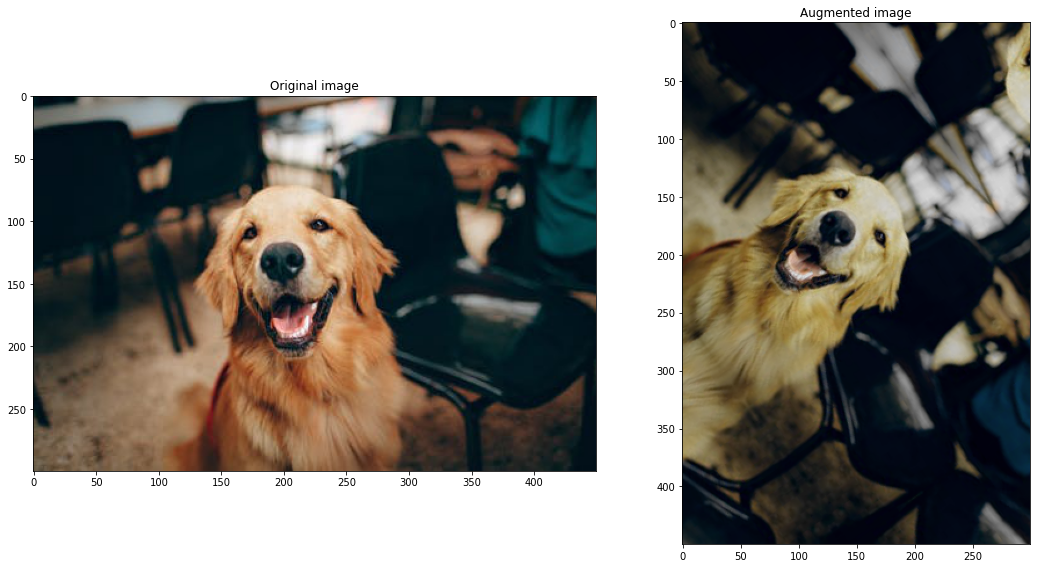

In [ ]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),

        #add noise
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),

        #blur
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),

        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
       
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),

        # sharp
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
augment_and_show_onlypic(aug=transform,image=image)

## Weather


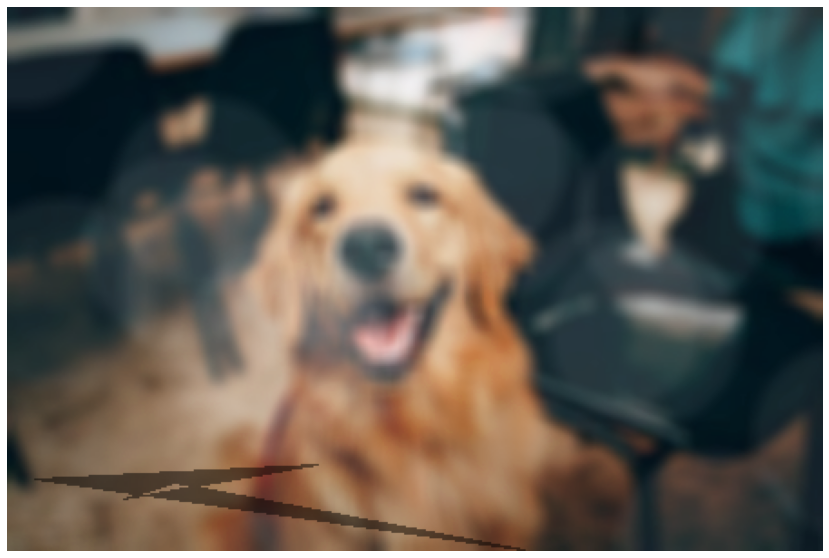

In [ ]:
transform = A.Compose( 
        A.OneOf([
            A.RandomFog(fog_coef_lower=0.7, fog_coef_upper=0.8, alpha_coef=0.1, p=0.2),
            A.RandomShadow(num_shadows_lower=1, num_shadows_upper=1, shadow_dimension=5, shadow_roi=(0, 0.5, 1, 1), p=0.2),
            A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, p=0.2),
            A.RandomSnow(brightness_coeff=2.5, snow_point_lower=0.3, snow_point_upper=0.5, p=0.2),
            A.RandomRain(brightness_coefficient=0.9, drop_width=1, blur_value=5, p=0.2)
        ], p=0.2)
        )

transformed = transform(image=image)
visualize(transformed['image'])

# BBox

# Mask


# Replay


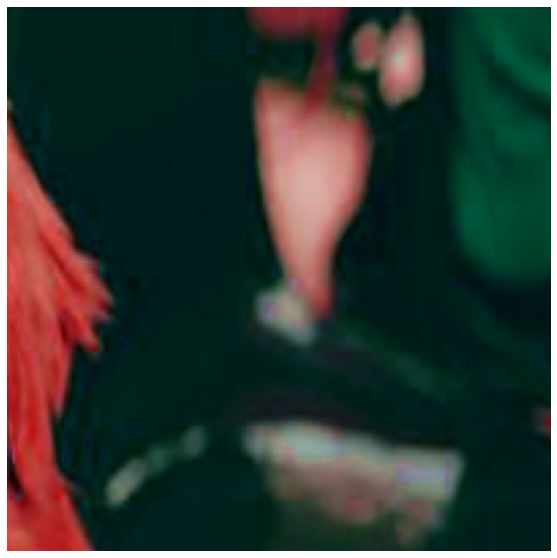

In [ ]:
transform = A.ReplayCompose([
    A.Resize(512, 512, always_apply=True),
    A.RandomCrop(200, 200, always_apply=True),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])
data = transform(image=image)
visualize(data['image'])

In [ ]:
print(data['replay'])

A.save(transform, '/tmp/transform.json')
loaded_transform = A.load('/tmp/transform.json')
print(loaded_transform)

{'__class_fullname__': 'ReplayCompose', 'params': None, 'transforms': [{'__class_fullname__': 'Resize', 'always_apply': True, 'p': 1, 'height': 512, 'width': 512, 'interpolation': 1, 'params': {}, 'applied': True}, {'__class_fullname__': 'RandomCrop', 'always_apply': True, 'p': 1.0, 'height': 200, 'width': 200, 'params': {'h_start': 0.3819980852600645, 'w_start': 0.9448548937463278}, 'applied': True}, {'__class_fullname__': 'OneOf', 'params': None, 'transforms': [{'__class_fullname__': 'RGBShift', 'always_apply': False, 'p': 0.5, 'r_shift_limit': (-20, 20), 'g_shift_limit': (-20, 20), 'b_shift_limit': (-20, 20), 'params': None, 'applied': False}, {'__class_fullname__': 'HueSaturationValue', 'always_apply': False, 'p': 0.5, 'hue_shift_limit': (-20, 20), 'sat_shift_limit': (-30, 30), 'val_shift_limit': (-20, 20), 'params': {'hue_shift': -11.927860270481414, 'sat_shift': 28.258794897194363, 'val_shift': 1.0107529486149502}, 'applied': True}], 'applied': True}], 'bbox_params': None, 'keypo

# AutoAlbument

In [ ]:
pip install -U autoalbument
!autoalbument-create --config-dir </path/to/directory> --task <deep_learning_task> --num-classes <num_classes>
#autoalbument-create --config-dir ~/experiments/autoalbument-search-cifar10 --task classification --num-classes 10